**Problem Statement 1**

The objective of this project is to develop a credit card fraud detection system using machine learning techniques. The system aims to identify fraudulent credit card transactions in real-time, providing timely alerts to prevent financial losses for both cardholders and financial institutions.

**Installing Required Packages**

In [55]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Required Packages**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from tensorflow import keras
from sklearn.metrics import precision_recall_curve, auc
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score)
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import pickle

**Connecting Drive with Colab Notebook**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Datasets**

In [58]:
df = pd.read_csv('/content/drive/MyDrive/JIS_2.0/training.csv')

Printing the first 5 rows of the dataset

In [59]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,16.00,0.69,-1.36,1.03,0.83,-1.19,1.31,-0.88,0.45,-0.45,...,-0.30,-0.57,-0.05,-0.30,0.07,-0.42,0.09,0.06,231.71,0
1,17.00,0.96,0.33,-0.17,2.11,1.13,1.70,0.11,0.52,-1.19,...,0.14,0.40,-0.05,-1.37,0.39,0.20,0.02,-0.01,34.09,0
2,18.00,1.17,0.50,-0.07,2.26,0.43,0.09,0.24,0.14,-0.99,...,0.02,-0.06,-0.10,-0.37,0.60,0.11,-0.04,-0.01,2.28,0
3,18.00,0.25,0.28,1.19,-0.09,-1.31,-0.15,-0.95,-1.62,1.54,...,1.65,0.20,-0.19,0.42,0.82,-0.23,0.34,0.25,22.75,0
4,22.00,-1.95,-0.04,-0.41,-1.01,2.94,2.96,-0.06,0.86,0.05,...,-0.58,-0.80,0.87,0.98,0.32,0.15,0.71,0.01,0.89,0


Printing the last 5 rows of the dataset

In [60]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284772,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284773,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284774,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284775,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0
284776,172792.00,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,-0.41,0.49,...,0.26,0.64,0.38,0.01,-0.47,-0.82,-0.00,0.01,217.00,0


##**Exploratory Data Analysis**

In [61]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Out of the 30 columns in the dataset 28 of them have been transformed with the help of PCA, and have been renamed as V1, V2, V3, ... V28 and the remaining columns are Time and Amount.

Class is a Class variable that labels the transaction as fraud or not

In [62]:
df.Class.unique()

array([0, 1])

This shows that the transaction are categorized into two categories i.e. Fraud and Not Fraud

0 -> Non - Fraudalent transaction

1 -> Fraudalent transaction

In [63]:
df.Class.value_counts()

0    284295
1       482
Name: Class, dtype: int64

From this we can observe that the number of fradulent transactions is 0.1727% of the total number of transactions. This clearly shows the class imbalance issue.

In [64]:
df.shape

(284777, 31)

In [65]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,...,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00,284777.00
mean,94823.64,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,88.35,0.00
std,47481.06,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.13,0.04
min,16.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54214.00,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84707.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139324.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.17,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


The maximum value in the Amount column as observed in the table is 25691.16

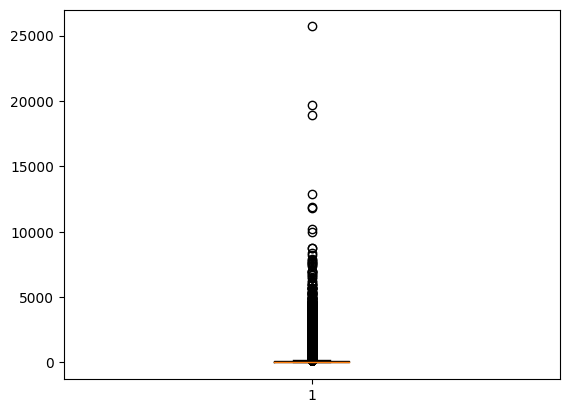

In [66]:
plt.boxplot(data = df, x='Amount')
plt.show()

By further observation using the boxplot, we understand that the maximum value is an outlier

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284777 entries, 0 to 284776
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284777 non-null  float64
 1   V1      284777 non-null  float64
 2   V2      284777 non-null  float64
 3   V3      284777 non-null  float64
 4   V4      284777 non-null  float64
 5   V5      284777 non-null  float64
 6   V6      284777 non-null  float64
 7   V7      284777 non-null  float64
 8   V8      284777 non-null  float64
 9   V9      284777 non-null  float64
 10  V10     284777 non-null  float64
 11  V11     284777 non-null  float64
 12  V12     284777 non-null  float64
 13  V13     284777 non-null  float64
 14  V14     284777 non-null  float64
 15  V15     284777 non-null  float64
 16  V16     284777 non-null  float64
 17  V17     284777 non-null  float64
 18  V18     284777 non-null  float64
 19  V19     284777 non-null  float64
 20  V20     284777 non-null  float64
 21  V21     28

In [68]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in the dataset.

In [69]:
pd.set_option("display.float", "{:.2f}".format)

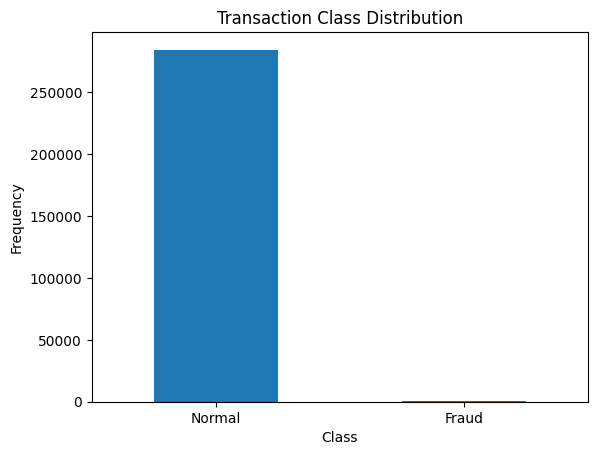

In [70]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [71]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (482, 31)
Shape of Non-Fraudulant transactions: (284295, 31)


In [72]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,482.00,284295.00
mean,123.02,88.29
std,258.19,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.91,22.00
75%,105.89,77.05
max,2125.87,25691.16


The mean of fradulent data is more than the mean of non fradulent data

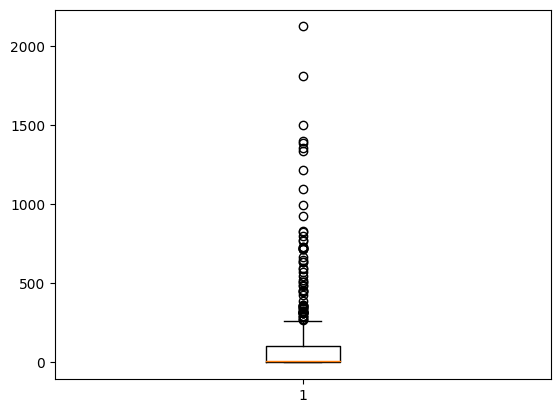

In [73]:
plt.boxplot(data = fraud, x='Amount')
plt.show()

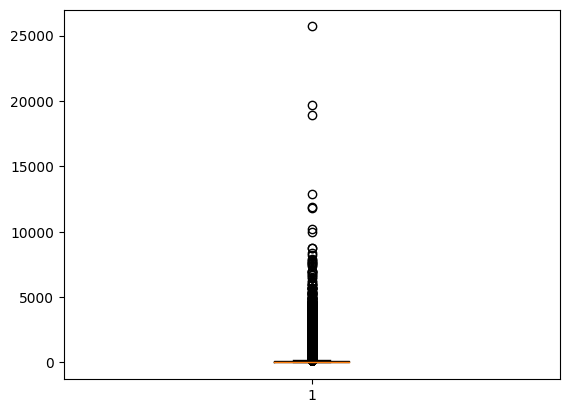

In [74]:
plt.boxplot(data = normal, x='Amount')
plt.show()

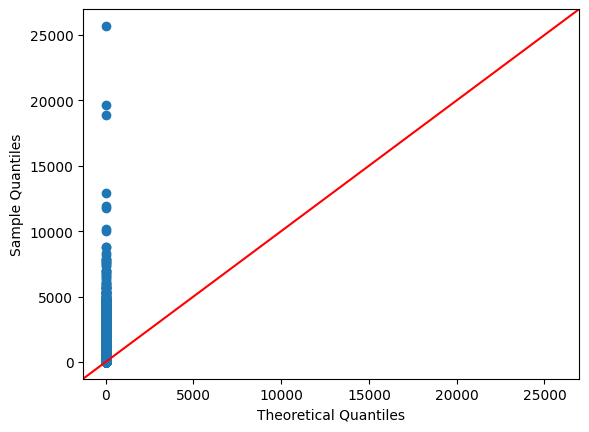

In [75]:
sm.qqplot(normal['Amount'], line ='45')
py.show()

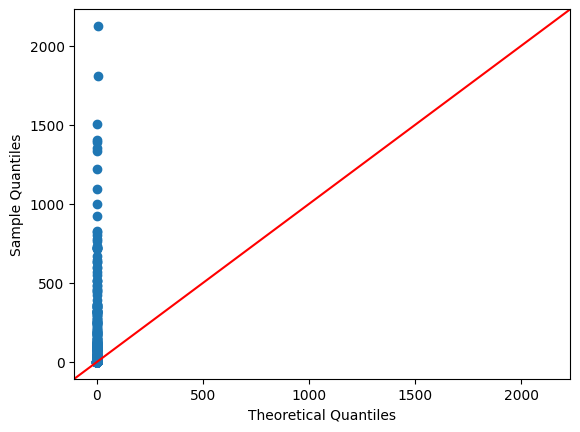

In [76]:
sm.qqplot(fraud['Amount'], line ='45')
py.show()

This shows the positive skewness and positive kurtosis

##**Plotting a normal curve**

Text(0.5, 1.0, 'Normal Distribution of Amount')

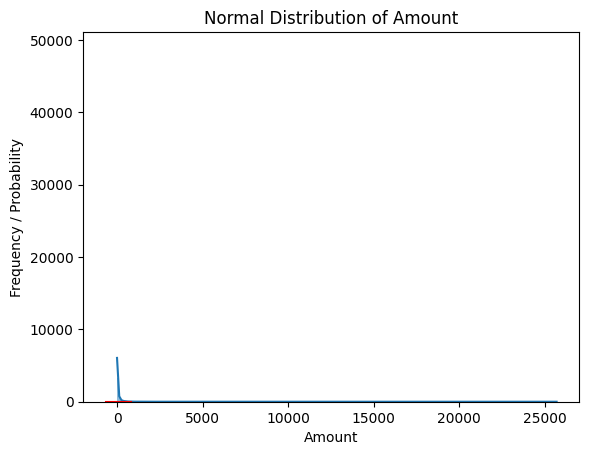

In [77]:
amount_data = df['Amount']

mean = np.mean(amount_data)
std_dev = np.std(amount_data)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
y = 1/(std_dev * np.sqrt(2*np.pi)) * np.exp(-(x - mean)**2 / (2*std_dev**2))

sns.histplot(amount_data, kde=True)

plt.plot(x, y, color='red')

plt.xlabel('Amount')
plt.ylabel('Frequency / Probability')
plt.title('Normal Distribution of Amount')


This shows that the data is right skewed and displays the class imbalance issue.

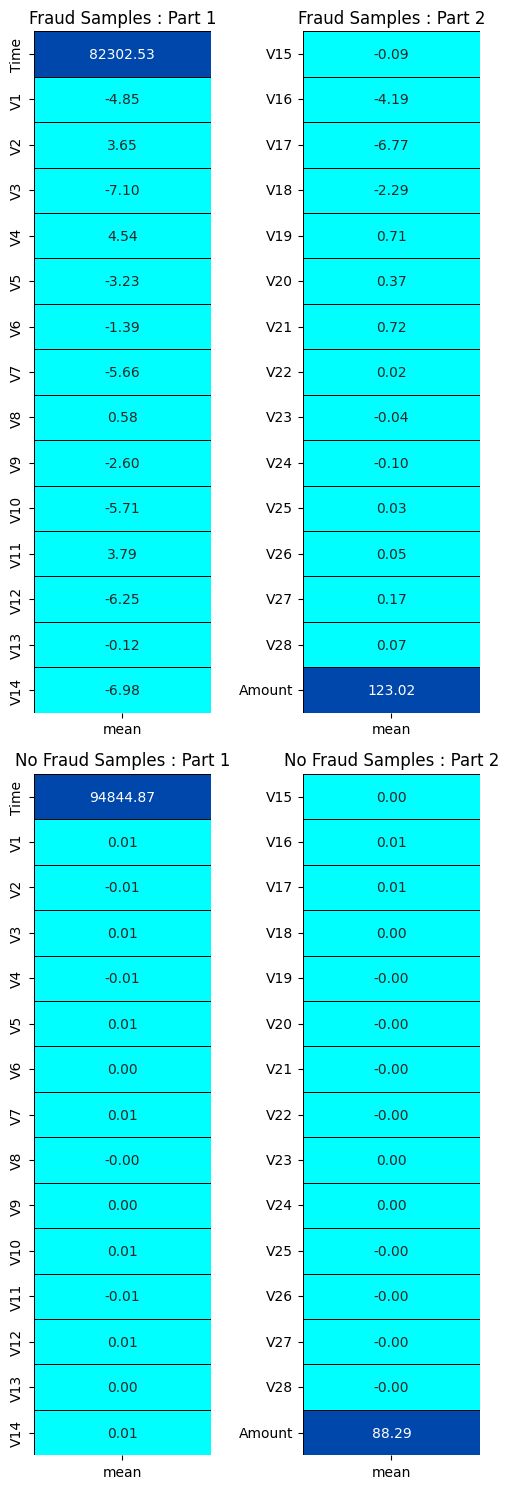

In [78]:
fraud = df[df['Class'] == 1].describe().T
nofraud = df[df['Class'] == 0].describe().T

colors = ['#00FFFF','#0047AB']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

##**Data Visualization**

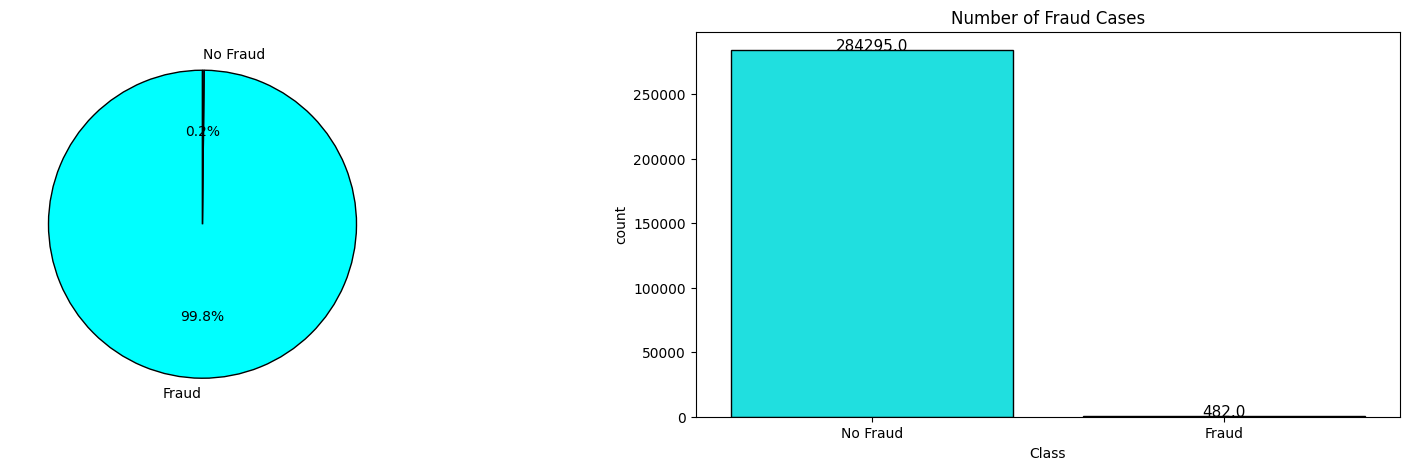

In [79]:
fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class',data = df, edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');
#df = sns.load_dataset('xyz')
#sns.countplot(x ='column', data = df)

##**Distribution**

<ipython-input-80-b738e9c689e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], color='blue');
<ipython-input-80-b738e9c689e4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'],color='blue');


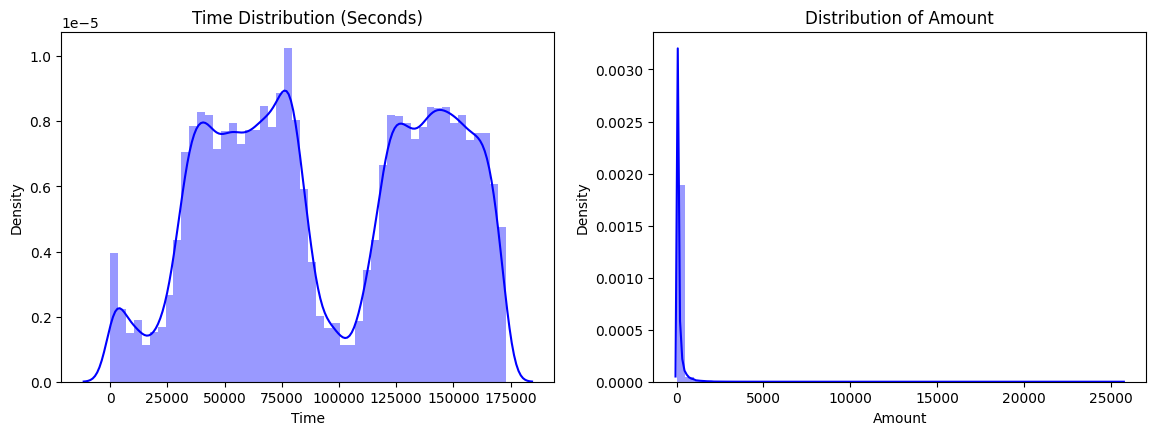

In [80]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='blue');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='blue');
plt.show()

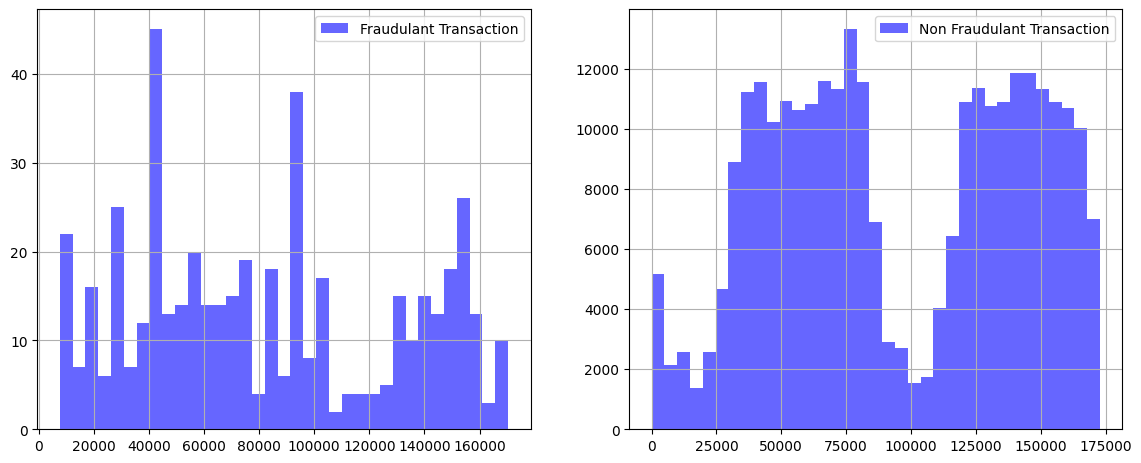

In [81]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction"
)
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction"
)
plt.legend()

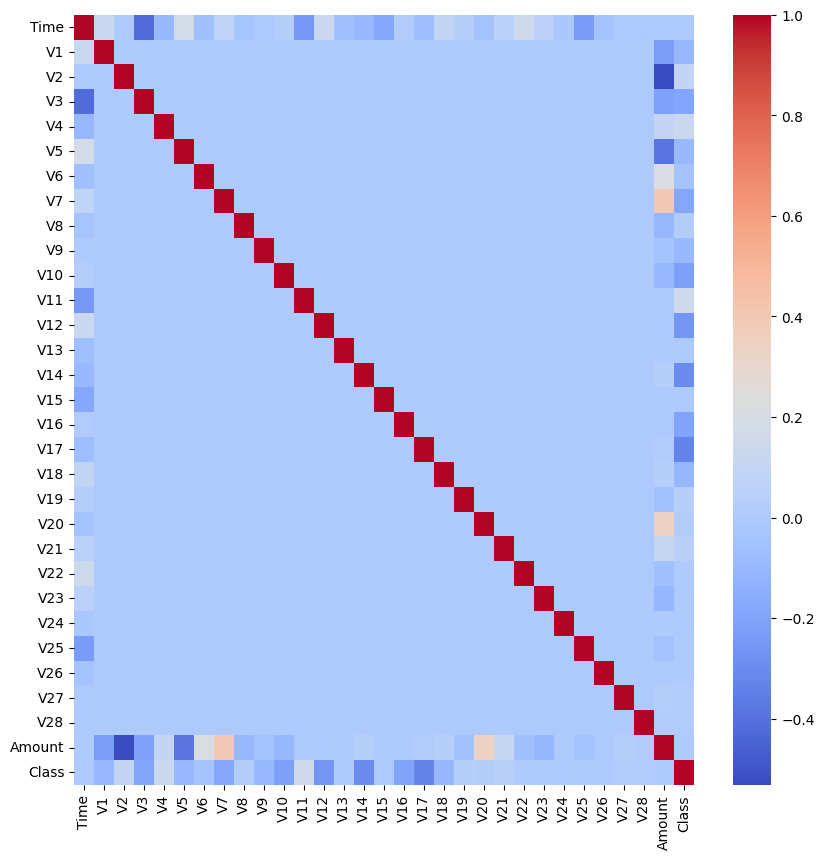

In [82]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="coolwarm")
plt.show();

In [83]:
corr_matrix = df.corr()

In [84]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.23,-0.10
V2,-0.01,-0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,0.00,0.00,1.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.39,-0.10
V6,-0.06,-0.00,0.00,-0.00,0.00,-0.00,1.00,-0.00,0.00,-0.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,-0.00,0.00,-0.00,-0.00,1.00,0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.04,-0.10


In [85]:
def Cal_Valid_Corr():

  cols = df.columns
  n = df.shape[1]

  for i in range(0, n):
    for j in range(i+1, n):
      if corr_matrix.iloc[i][j] <= -0.39 or corr_matrix.iloc[i][j] >= 0.39:
        print(cols[i], "&", cols[j], "=", corr_matrix.iloc[i][j])


In [86]:
Cal_Valid_Corr()

Time & V3 = -0.41984629693893794
V2 & Amount = -0.5314314395450017
V7 & Amount = 0.3973239731634255


##**Data Preprocessing**

In [87]:
scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0016805247250335478
Non-Fraudulant transaction weight: 0.9983194752749665


In [88]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159474, 30), y_train: (159474,)
_______________________________________________________
VALIDATION: X_validate: (39869, 30), y_validate: (39869,)
__________________________________________________
TESTING: X_test: (85434, 30), y_test: (85434,)


In [89]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

##**Model Building**

In [90]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    batch_size=2048,
    epochs=50,
#     class_weight=class_weight,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/50
78/78 [==============================] - 7s 59ms/step - loss: 0.8033 - fn: 49.0000 - fp: 72882.0000 - tn: 86324.0000 - tp: 219.0000 - precision: 0.0030 - recall: 0.8172 - val_loss: 0.5774 - val_fn: 15.0000 - val_fp: 465.0000 - val_tn: 39330.0000 - val_tp: 59.0000 - val_precision: 0.1126 - val_recall: 0.7973
Epoch 2/50
78/78 [==============================] - 4s 56ms/step - loss: 0.6887 - fn: 28.0000 - fp: 61235.0000 - tn: 97971.0000 - tp: 240.0000 - precision: 0.0039 - recall: 0.8955 - val_loss: 0.5155 - val_fn: 15.0000 - val_fp: 193.0000 - val_tn: 39602.0000 - val_tp: 59.0000 - val_precision: 0.2341 - val_recall: 0.7973
Epoch 3/50
78/78 [==============================] - 6s 72ms/step - loss: 0.6107 - fn: 40.0000 - fp: 48164.0000 - tn: 111042.0000 - tp: 228.0000 - precision: 0.0047 - recall: 0.8507 - val_loss: 0.4735 - val_fn: 15.0000 - val_fp: 103.0000 - val_tn: 39692.0000 - val_tp: 59.0000 - val_precision: 0.3642 - val_recall: 0.7973
Epoch 4/50
78/78 [=====================

##**ANN**

In [91]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)
print("AUPRC:", auprc)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
        'AUPRC' : auprc,
    },
}

2670/2670 [==============================] - 4s 1ms/step
Train Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.84      1.00       0.92          1.00
recall         1.00   0.81      1.00       0.91          1.00
f1-score       1.00   0.83      1.00       0.91          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159164     42]
 [    50    218]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.86      1.00       0.93          1.00
recall        1.00   0.77      1.00       0.89          1.00
f1-score      1.00   0.81      1.00       0.91          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_________

##**XGBoost**

In [92]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
        'AUPRC' : auprc,
}

print("AUPRC:", auprc)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159206      0]
 [     0    268]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.87      1.00       0.93          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix:

##**Random Forest**

In [93]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
        'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159206      0]
 [     0    268]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.94      1.00       0.97          1.00
recall        1.00   0.74      1.00       0.87          1.00
f1-score      1.00   0.83      1.00       0.91          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix:

##**CatBoost**

In [94]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
        'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Learning rate set to 0.089843
0:	learn: 0.3903367	total: 33.2ms	remaining: 33.1s
1:	learn: 0.2248051	total: 67.6ms	remaining: 33.7s
2:	learn: 0.1299265	total: 101ms	remaining: 33.6s
3:	learn: 0.0757280	total: 131ms	remaining: 32.6s
4:	learn: 0.0458319	total: 164ms	remaining: 32.6s
5:	learn: 0.0296318	total: 198ms	remaining: 32.8s
6:	learn: 0.0201459	total: 231ms	remaining: 32.7s
7:	learn: 0.0140672	total: 259ms	remaining: 32.2s
8:	learn: 0.0104512	total: 289ms	remaining: 31.8s
9:	learn: 0.0079759	total: 322ms	remaining: 31.9s
10:	learn: 0.0065814	total: 351ms	remaining: 31.6s
11:	learn: 0.0054295	total: 379ms	remaining: 31.2s
12:	learn: 0.0046299	total: 410ms	remaining: 31.1s
13:	learn: 0.0040624	total: 441ms	remaining: 31s
14:	learn: 0.0037048	total: 469ms	remaining: 30.8s
15:	learn: 0.0034018	total: 502ms	remaining: 30.9s
16:	learn: 0.0031649	total: 538ms	remaining: 31.1s
17:	learn: 0.0029914	total: 577ms	remaining: 31.5s
18:	learn: 0.0028446	total: 605ms	remaining: 31.3s
19:	learn: 

##**LigthGBM**

In [95]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
        'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Train Result:
Accuracy Score: 99.89%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.64      1.00       0.82          1.00
recall         1.00   0.76      1.00       0.88          1.00
f1-score       1.00   0.70      1.00       0.85          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159093    113]
 [    65    203]]

Test Result:
Accuracy Score: 99.71%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.32      1.00       0.66          1.00
recall        1.00   0.69      1.00       0.85          1.00
f1-score      1.00   0.44      1.00       0.72          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix: 

##**Isolation Forest**

In [96]:
# Assuming you have y_train and y_test as the target labels for training and test sets, respectively

isf = IsolationForest(random_state = 42, max_samples = len(X))
isf.fit(X_train, y_train)

y_train_pred = isf.predict(X_train)
y_test_pred = isf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Isolation Forest'] = {
    'Train': f1_score(y_train, y_train_pred, average='macro'),
    'Test': f1_score(y_test, y_test_pred, average='macro'),
    'AUPRC' : auprc,
}

print("AUPRC:", auprc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (284777) is greater than the total number of samples (159474). max_samples will be set to n_samples for estimation.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0

Train Result:
Accuracy Score: 0.10%
_______________________________________________
Classification Report:
            -1         0      1  accuracy  macro avg  weighted avg
precision 0.00      0.00   0.00      0.00       0.00          0.00
recall    0.00      0.00   0.60      0.00       0.20          0.00
f1-score  0.00      0.00   0.00      0.00       0.00          0.00
support   0.00 159206.00 268.00      0.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[     0      0      0]
 [   266      0 158940]
 [   108      0    160]]

Test Result:
Accuracy Score: 0.10%
_______________________________________________
Classification Report:
            -1        0      1  accuracy  macro avg  weighted avg
precision 0.00     0.00   0.00      0.00       0.00          0.00
recall    0.00     0.00   0.60      0.00       0.20          0.00
f1-score  0.00     0.00   0.00      0.00       0.00          0.00
support   0.00 85294.00 140.00      0.00   854

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

##**Logistic Regression Model**

In [97]:
# Assuming you have y_train and y_test as the target labels for training and test sets, respectively
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Isolation Forest'] = {
    'Train': f1_score(y_train, y_train_pred, average='macro'),
    'Test': f1_score(y_test, y_test_pred, average='macro'),
    'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Train Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.88      1.00       0.94          1.00
recall         1.00   0.63      1.00       0.82          1.00
f1-score       1.00   0.74      1.00       0.87          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159182     24]
 [    98    170]]

Test Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.88      1.00       0.94          1.00
recall        1.00   0.59      1.00       0.80          1.00
f1-score      1.00   0.71      1.00       0.85          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix: 

##**Decision Tree Classifier**

In [98]:
# Assuming you have y_train and y_test as the target labels for training and test sets, respectively
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train,y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Decision Tree'] = {
    'Train': f1_score(y_train, y_train_pred, average='macro'),
    'Test': f1_score(y_test, y_test_pred, average='macro'),
    'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159206      0]
 [     0    268]]

Test Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.75      1.00       0.88          1.00
recall        1.00   0.76      1.00       0.88          1.00
f1-score      1.00   0.75      1.00       0.88          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix:

##**Naive Bias Classifier**

In [99]:
NB = BernoulliNB()
NB.fit(X_train,y_train)

y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

scores_dict['Naive Bias'] = {
    'Train': f1_score(y_train, y_train_pred, average='macro'),
    'Test': f1_score(y_test, y_test_pred, average='macro'),
    'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Train Result:
Accuracy Score: 99.91%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.81      1.00       0.91          1.00
recall         1.00   0.64      1.00       0.82          1.00
f1-score       1.00   0.72      1.00       0.86          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159166     40]
 [    96    172]]

Test Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.83      1.00       0.91          1.00
recall        1.00   0.66      1.00       0.83          1.00
f1-score      1.00   0.74      1.00       0.87          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix: 

##**SVM Classifier**

In [100]:
svm_clf = SVC()
svm_clf.fit(X_train,y_train)

y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred.round())

# Calculate AUPRC
auprc = auc(recall, precision)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['SVM'] = {
    'Train': f1_score(y_train, y_train_pred, average='macro'),
    'Test': f1_score(y_test, y_test_pred, average='macro'),
    'AUPRC' : auprc,
}

print("AUPRC:", auprc)

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.97      1.00       0.99          1.00
recall         1.00   0.84      1.00       0.92          1.00
f1-score       1.00   0.90      1.00       0.95          1.00
support   159206.00 268.00      1.00  159474.00     159474.00
_______________________________________________
Confusion Matrix: 
 [[159200      6]
 [    44    224]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.96          1.00
recall        1.00   0.62      1.00       0.81          1.00
f1-score      1.00   0.74      1.00       0.87          1.00
support   85294.00 140.00      1.00   85434.00      85434.00
_______________________________________________
Confusion Matrix: 

##**Model Comparison**

<Axes: >

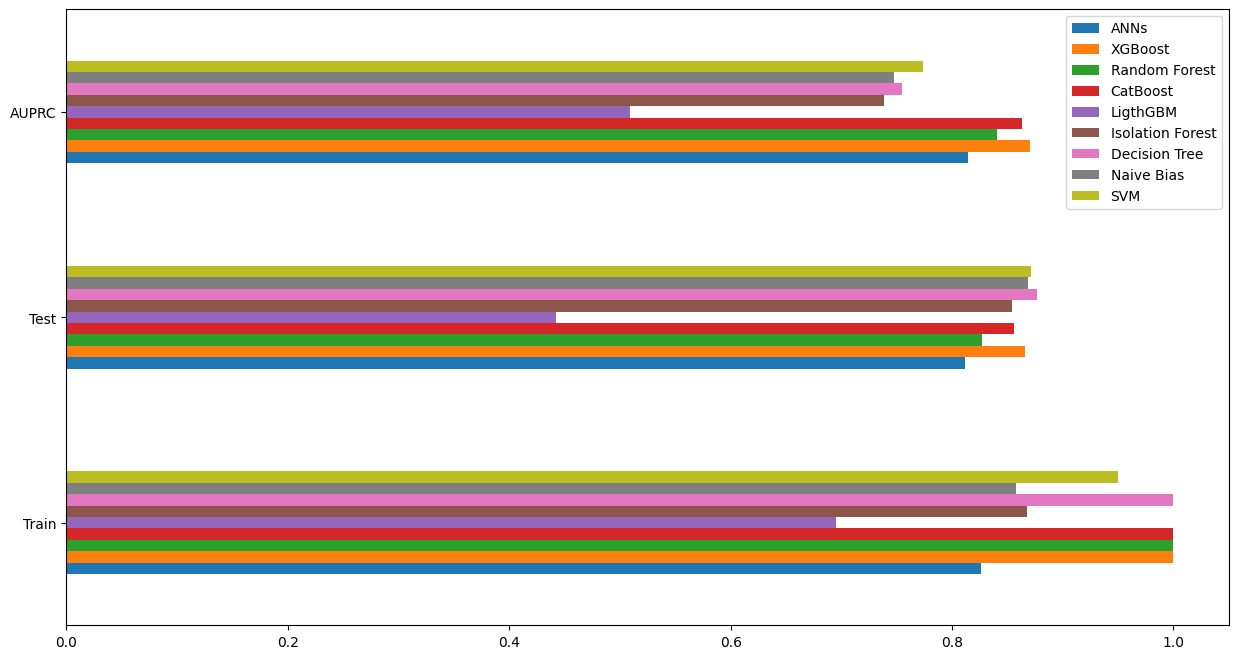

In [101]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

In [102]:
scores_df

,ANNs,XGBoost,Random Forest,CatBoost,LigthGBM,Isolation Forest,Decision Tree,Naive Bias,SVM
Train,0.83,1.00,1.00,1.00,0.70,0.87,1.00,0.86,0.95
Test,0.81,0.87,0.83,0.86,0.44,0.85,0.88,0.87,0.87
AUPRC,0.81,0.87,0.84,0.86,0.51,0.74,0.75,0.75,0.77


Hence, we observe that XGBoost gives the best AUPRC score as well as the best training and testing accuracy for the given dataset.


In [103]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_clf, file)